## Guía 1 - Ejercicio 01 - Versión 01

Se tiene una placa cuadrada de aluminio cuyos bordes están en las condiciones que se indican en la
figura: tres lados a temperaturas fijas y otro, el inferior, aislado térmicamente (flujo de calor igual a
cero). Encuentre, utilizando el método de diferencias finitas, los valores de temperatura y flujo de
calor para cada punto. Utilice primero la grilla señalada y luego generalice el problema a un número
variable de nodos en cada eje de coordenadas. Haga un estudio del tiempo de cálculo en función del
tamaño del sistema

Primero hago el programa con condiciones de contorno de temperaturas FIJAS. 

#### Temperaturas Fijas ####

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,20))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=22)
# import copy
# import random
# import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100)

In [2]:
Nx = 50
Ny = 50

Tleft = 75
Tright = 50
Tup = 100
Tdown = 0

initialT = [Tleft, Tright, Tup, Tdown]

matrix = np.eye(Nx*Ny, Nx*Ny)
vectorB = np.zeros(Nx*Ny)
beta = Nx / Ny

In [3]:
for i in range(1, Nx - 1):
    for j in range(1, Ny - 1):
        k = i + j * Nx
        # print(k)
        matrix[k, k - Nx] = beta ** 2
        matrix[k, k - 1] = 1
        matrix[k, k] = - 2 * (1 + beta ** 2)
        matrix[k, k + 1] = 1
        matrix[k, k + Nx] = beta ** 2

> plt.rc('figure', figsize=(10, 10))
plt.imshow(matrix)
plt.colorbar()

> Agregar lineas de contorno
> contourf(matrizdetemperaturas)

Hay que hacerlo de una manera más automática

Hay que poner las temperaturas en los bordes

Consideor que en las esquinas tengo la temperatura promedio de ambos lados

In [4]:
for i in range(0, Nx):
    for j in range(0, Ny):
        k = i + j * Nx
        # print(k)
        # initialT = [Tleft, Tright, Tup, Tdown]
        if i == 0:        # Borde izquierdo
            if j == 0:
                vectorB[k] = (initialT[0] + initialT[2]) / 2
            elif j == Ny - 1:
                vectorB[k] = (initialT[0] + initialT[3]) / 2
            else:
                vectorB[k] = initialT[0]

        elif i == Nx - 1:  # Borde derecho
            if j == 0:
                vectorB[k] = (initialT[1] + initialT[2]) / 2
            elif j == Ny - 1:
                vectorB[k] = (initialT[1] + initialT[3]) / 2
            else:
                vectorB[k] = initialT[1]

        elif j == 0:       # Borde superior
            vectorB[k] = initialT[2]

        elif j == Ny:      # Borde inferior
            vectorB[k] = initialT[3]

In [5]:
T = np.linalg.solve(matrix, vectorB)

In [6]:
tempMatrix = np.zeros([Nx, Ny])
for i in range(0, Nx):
    for j in range(0, Ny):
        k = i + j * Nx
        tempMatrix[j, i] = T[k]

Ojo que las matrices en Python quedan definidos como `matrix[filas, columnas]`

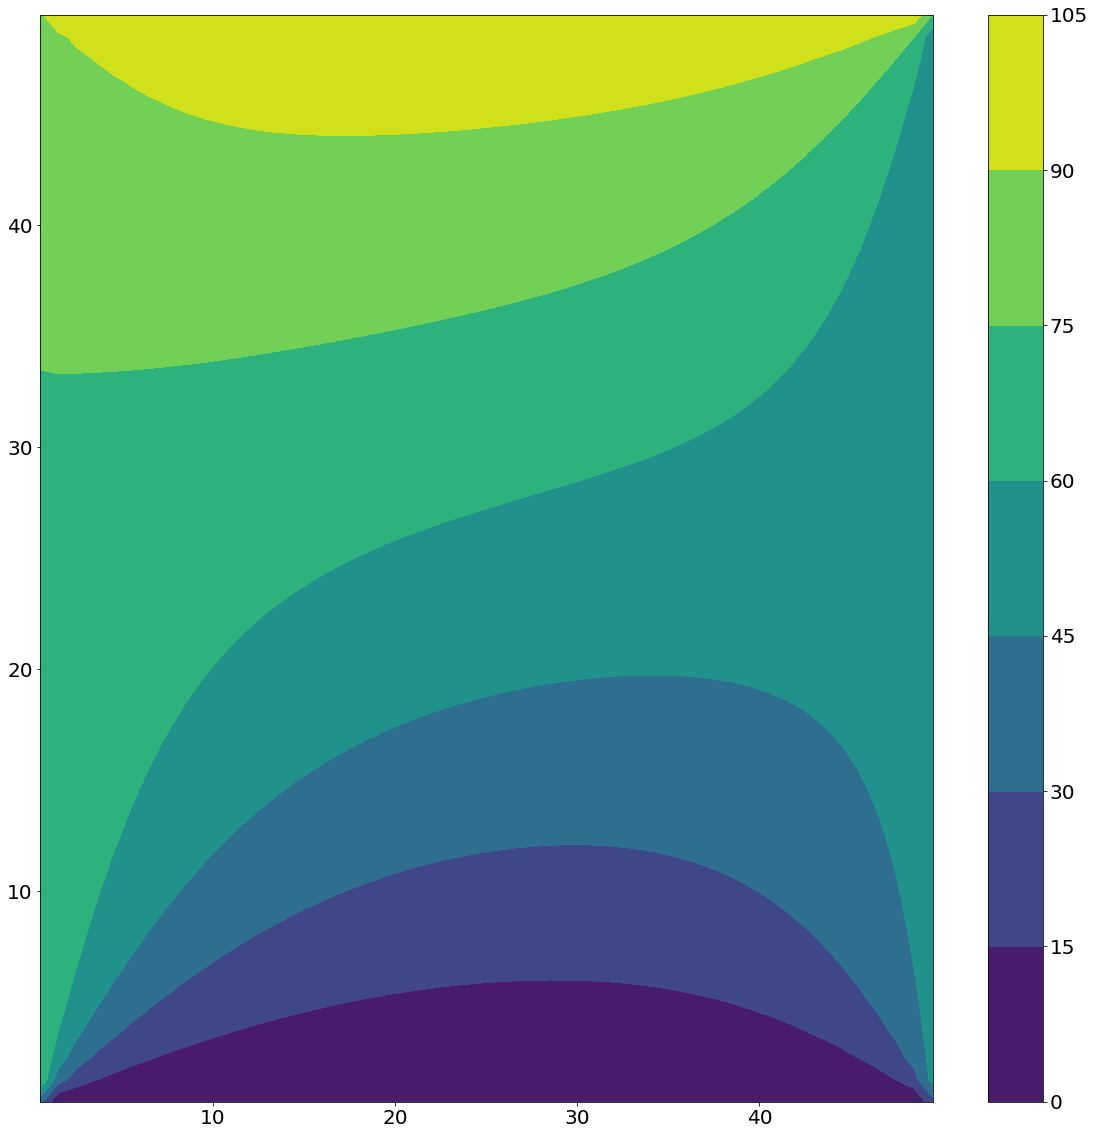

In [9]:
# plt.imshow(tempMatrix)
plt.contourf(tempMatrix, origin='upper')
plt.colorbar()

### Con flujos ###

¿tuviste algun problema o simplemente no llegaste a hacerlo ? 